In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
solicitantes = pd.read_excel('/content/drive/MyDrive/Analisis de Negocios/0. SolicitantesCrédito.xlsx')

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


In [9]:
XD = solicitantes.dropna(subset=['PreApr'])

In [10]:
XD = XD[['Edad','Hijos','Perscargo','Estrato','Ingresos','Egresos','Monto (EAD)','Plazo','Cuota (COP)']]

In [11]:
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [12]:
yd = solicitantes['PreApr'].dropna()

In [13]:
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [15]:
XDArray = np.array(XD)
ydArray = np.array(yd)

In [20]:
### Entrenamos el modelo (Fase Train)
modeloNB = GaussianNB()
modeloNB.fit(XDArray, ydArray)

GaussianNB()

In [25]:
### Predecimos los yd (Etapa Test)
ydPred = modeloNB.predict(XDArray)

### Matriz de confusion

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

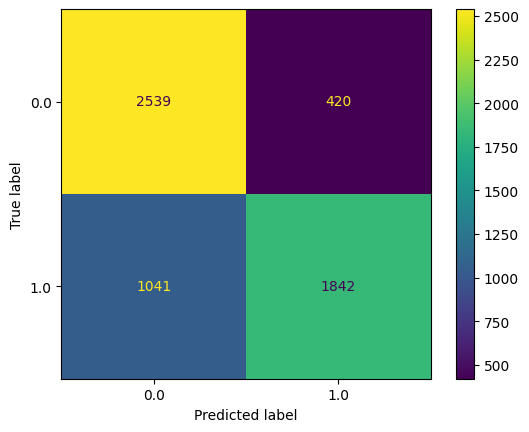

In [32]:
disp = ConfusionMatrixDisplay(cm, display_labels=modeloNB.classes_)
disp.plot()
plt.show()

### Metricas de evaluacion del modelo

In [38]:
### Extraigo los valores de la matriz de confusion
VN = cm[0,0] ; FP = cm[0,1] ; FN = cm[1,0] ; VP = cm[1,1]

In [39]:
## Exactitud
exactitud = (VP + VN)/cm.sum()

## Error
error = (FP + FN)/cm.sum()

##Precision
precision = VP/(FP + VP)

## Sensibilidad
sensibilidad = VP/(VP+FN)

## Especificidad
especificidad = VN/(VN+FP)

In [42]:
### Imporimir los mensajes
print(f"La exactitud del modelo es de {exactitud:.2%} ")
print(f"El error del modelo es de {error:.2%} ")
print(f"La precision del modelo es de {precision:.2%} ")
print(f"La sensibilidad del modelo es de {sensibilidad:.2%} ")
print(f"La especificidad del modelo es de {especificidad:.2%} ")

La exactitud del modelo es de 74.99% 
El error del modelo es de 25.01% 
La precision del modelo es de 81.43% 
La sensibilidad del modelo es de 63.89% 
La especificidad del modelo es de 85.81% 


# METRICAS   
### Exactitud   
#### La exactitud del modelo bajó de 76.14% a 74.99% al usar nueve variables.    
#### Aunque se agregó más información, el modelo no mejoró su desempeño, ya que   
#### varias de las variables nuevas están relacionadas entre ellas (variables   
#### financieras) y esto afecta en el supuesto de que todas las variables son    
#### independientes por lo que falla el modelo.
####
### Tasa de error   
#### La tasa de error aumentó de 23.86% a 25.01%, lo que coincide con la    
#### disminución de la exactitud. Esto indica que el modelo con más variables   
#### comete más errores, ya que la información adicional hace más difícil la    
#### clasificación.
####
### Precisión   
#### La precisión mejoró un poco, pasando de 81.01% a 81.43%. Esto significa    
#### que el modelo con nueve variables es un poco más confiable cuando decide   
#### preaprobar el crédito, ya que reduce las aprobaciones incorrectas porque    
#### la revisión es mas estricta, por lo que hay más variables.   
####
### Sensibilidad   
#### La sensibilidad bajó de 67.46% a 63.89%. Esto muestra que el modelo con    
#### nueve variables identifica a menos solicitantes que sí cumplen con las    
#### condiciones, ya que se vuelve más estricto.   
####
### Especificidad   
#### La especificidad aumentó de 84.59% a 85.81%. Esto indica que el modelo con   
#### nueve variables es mejor para identificar a los solicitantes que no son    
#### aptos, lo que ayuda a disminuir el riesgo de aprobar créditos a personas    
#### con mayor probabilidad de incumplirlos.